In [1]:
from sklearn.datasets import fetch_mldata
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(100)

mnist1 = fetch_mldata('MNIST original')

X, y = mnist1['data'], mnist1['target']

X_train = X[:55000]
X_test = X[55000:65000]
X_val = X[65000:]

y = y.astype(int)

y_train = y[:55000]
y_test = y[55000:65000]
y_val = y[65000:]

shuffle_index = np.random.permutation(55000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'Greys', interpolation="nearest")
    plt.axis("off")
    pass

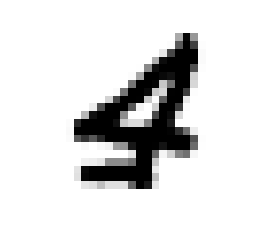

In [2]:
plot_digit(X_train[20000])

In [3]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [4]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv = 10, scoring = 'accuracy')

array([ 0.8568834 ,  0.86280211,  0.87765861,  0.88654545,  0.88963636,
        0.89398072,  0.88179669,  0.87634115,  0.87302165,  0.87081514])

In [5]:
y_train_pred = sgd_clf.predict(X_train)
y_test_pred = sgd_clf.predict(X_test)

In [6]:
from sklearn.metrics import precision_score, recall_score

print 'Train Precision: ', precision_score(y_train, y_train_pred, average='weighted')
print 'Test Precision: ', precision_score(y_test, y_test_pred, average='weighted')

Train Precision:  0.898679434139
Test Precision:  0.909604112037


In [7]:
from sklearn.metrics import accuracy_score

print 'Train Accuracy: ', accuracy_score(y_train, y_train_pred)
print 'Test Accuracy: ', accuracy_score(y_test, y_test_pred)

Train Accuracy:  0.896090909091
Test Accuracy:  0.6897
